In [1]:
import pandas as pd
import numpy as np

# Scikit-Learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Tensorflow
import tensorflow as tf

# TSNE Visualization
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

def image_show(i, data, label, pred):

    '''
    Given the index of an image, visualize it along with its corresponding
    (real or predicted) label

    Args:
      i (int): The index of an image
      data (list): The set that the image belongs to
      label (list): The label that the image has based on its index
      pred (list): The predicted label of the image

    Returns: -
    '''

    img = data[i] # Get the vectorized image
    img = img.reshape((28,28)) # Reshape it into 28x28 format
    print("\n Label: {}".format(label[i]))
    print("Predicted label: {}".format(pred[i]))
    # Show the image
    plt.imshow(img, cmap='gray')
    plt.show()

In [3]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# View the shape of the data set
print('X_train:{}'.format(X_train.shape))
print('y_train:{}'.format(y_train.shape))
print('X_test:{}'.format(X_test.shape))
print('y_test:{}'.format(y_test.shape))
print()

# Reshape to a 2D array
num_samples, width, height = X_train.shape
X_train = X_train.reshape((num_samples, width * height))

num_samples, width, height = X_test.shape
X_test = X_test.reshape((num_samples, width * height))

X_train:(60000, 28, 28)
y_train:(60000,)
X_test:(10000, 28, 28)
y_test:(10000,)



Start searching for the number of neighbors with the highest accuracy...
k = 1 with Accuracy = 96.91 %
k = 3 with Accuracy = 97.05 %
k = 5 with Accuracy = 96.88 %
k = 7 with Accuracy = 96.94 %
k = 9 with Accuracy = 96.59 %
k = 11 with Accuracy = 96.67999999999999 %
k = 13 with Accuracy = 96.53 %
Highest accuracy: 97.05 % for k = 3.



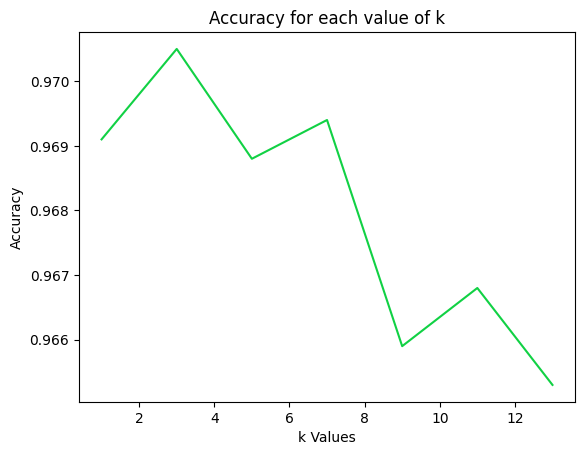

In [4]:
# Initialize the values of k along with the list of accuracies for each value of k
k_values = range(1, 15, 2)
k_accuracies = []

print("Start searching for the number of neighbors with the highest accuracy...")
# Loop over various values of 'k'
values = np.arange(1, 15, 2)
for k in values :
    # Train the classifier with the current value of 'k'
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # Evaluate the model
    eval_score = model.score(X_test, y_test)
    print("k = {} with Accuracy = {} %".format(k, eval_score * 100))
    # Update the accuracies list
    k_accuracies.append(eval_score)

# Find the value of 'k' with the highest accuracy
max_accuracy = int(np.argmax(k_accuracies))
print("Highest accuracy: {} % for k = {}.\n".format(k_accuracies[max_accuracy] * 100, k_values[max_accuracy]))

# Line plot for the accuracies based on the value of 'k'
plt.plot(k_values, k_accuracies, color = '#11d144')
plt.xlabel("k Values")
plt.ylabel("Accuracy")
plt.title("Accuracy for each value of k")
plt.show()

In [5]:
# Create k-NN Classifier
# Use the value of k which achieved the highest accuracy
knn_clf = KNeighborsClassifier(n_neighbors=k_values[max_accuracy])

#Train the model using the training data
knn_clf.fit(X_train, y_train)

#Predict the label for test data
preds = knn_clf.predict(X_test)

In [6]:
# Model evaluation with classification report
print("\nEvaluation Metrics\n", classification_report(y_test, preds))


Evaluation Metrics
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.006s...
[t-SNE] Computed neighbors for 10000 samples in 6.855s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 517.864415
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.609375
[t-SNE] KL divergence after 1000 iterations: 1.779227


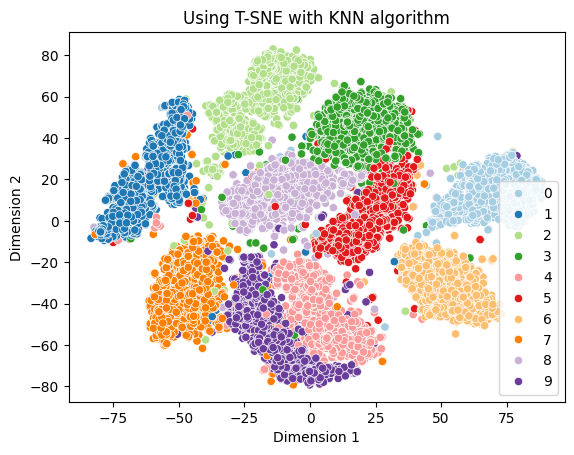

In [7]:
#t-SNE Visualization (2D)
tsne = TSNE(n_components=2, verbose=1, random_state=0)
z = tsne.fit_transform(X_test)
df = pd.DataFrame()
df["y"] = preds
df["Dimension 1"] = z[:,0]
df["Dimension 2"] = z[:,1]

sns.scatterplot(x="Dimension 1", y="Dimension 2", hue=df.y.tolist(),
                palette=sns.color_palette("Paired", 10),
                data=df).set(title="Using T-SNE with KNN algorithm")
plt.show()


 Label: 7
Predicted label: 7


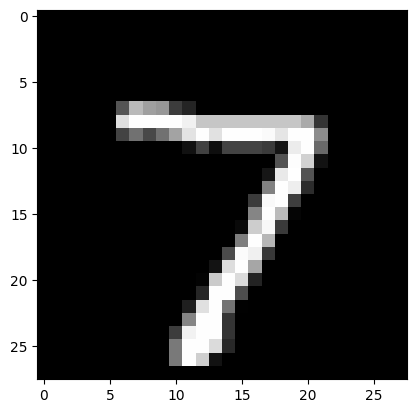


 Label: 2
Predicted label: 2


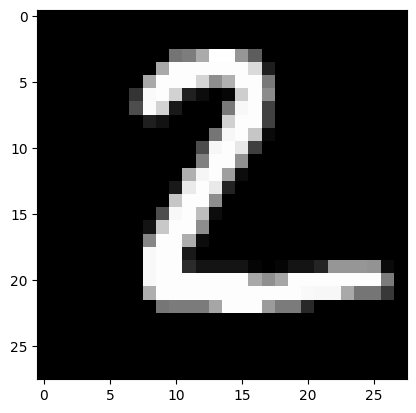

In [8]:
# Plot the images along with their predicted labels
for i in range(0,2):
    image_show(i, X_test, y_test, preds)